<a href="https://colab.research.google.com/github/oms0401/research_asthma_prediction/blob/main/traditional_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#stacking individual --> log,rfc,xgboost and using stacking method for this
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#stratagies to takle this - 1)- addition of mild and moderate as asthma and doing the prediction
#using the technique of all kind data imbalance to handle it
#use single classifier then moving towards the stacking classifier and third towards ann doing the classification for me
#hyperparameter tuning and cross validation score
#one more time --> taking just 10,000 long dataset instead of whole

In [ ]:
df = pd.read_csv('/content/processed-data.csv')
df.head(2)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0


In [ ]:
#Get the shape to know number of rows and columns
df.shape

(316800, 19)

In [ ]:
#Check for null values
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [ ]:
df['Severity_Moderate'].value_counts()

Severity_Moderate
0    237600
1     79200
Name: count, dtype: int64

In [ ]:
df['Severity_Mild'].value_counts()

Severity_Mild
0    237600
1     79200
Name: count, dtype: int64

In [ ]:
df.head(20)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
5,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
7,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
8,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Asthma'] = df['Severity_Mild'] + df['Severity_Moderate']

<Axes: ylabel='count'>

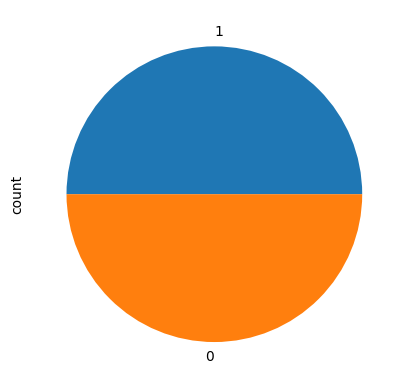

In [ ]:
df['Asthma'].value_counts().plot(kind='pie')

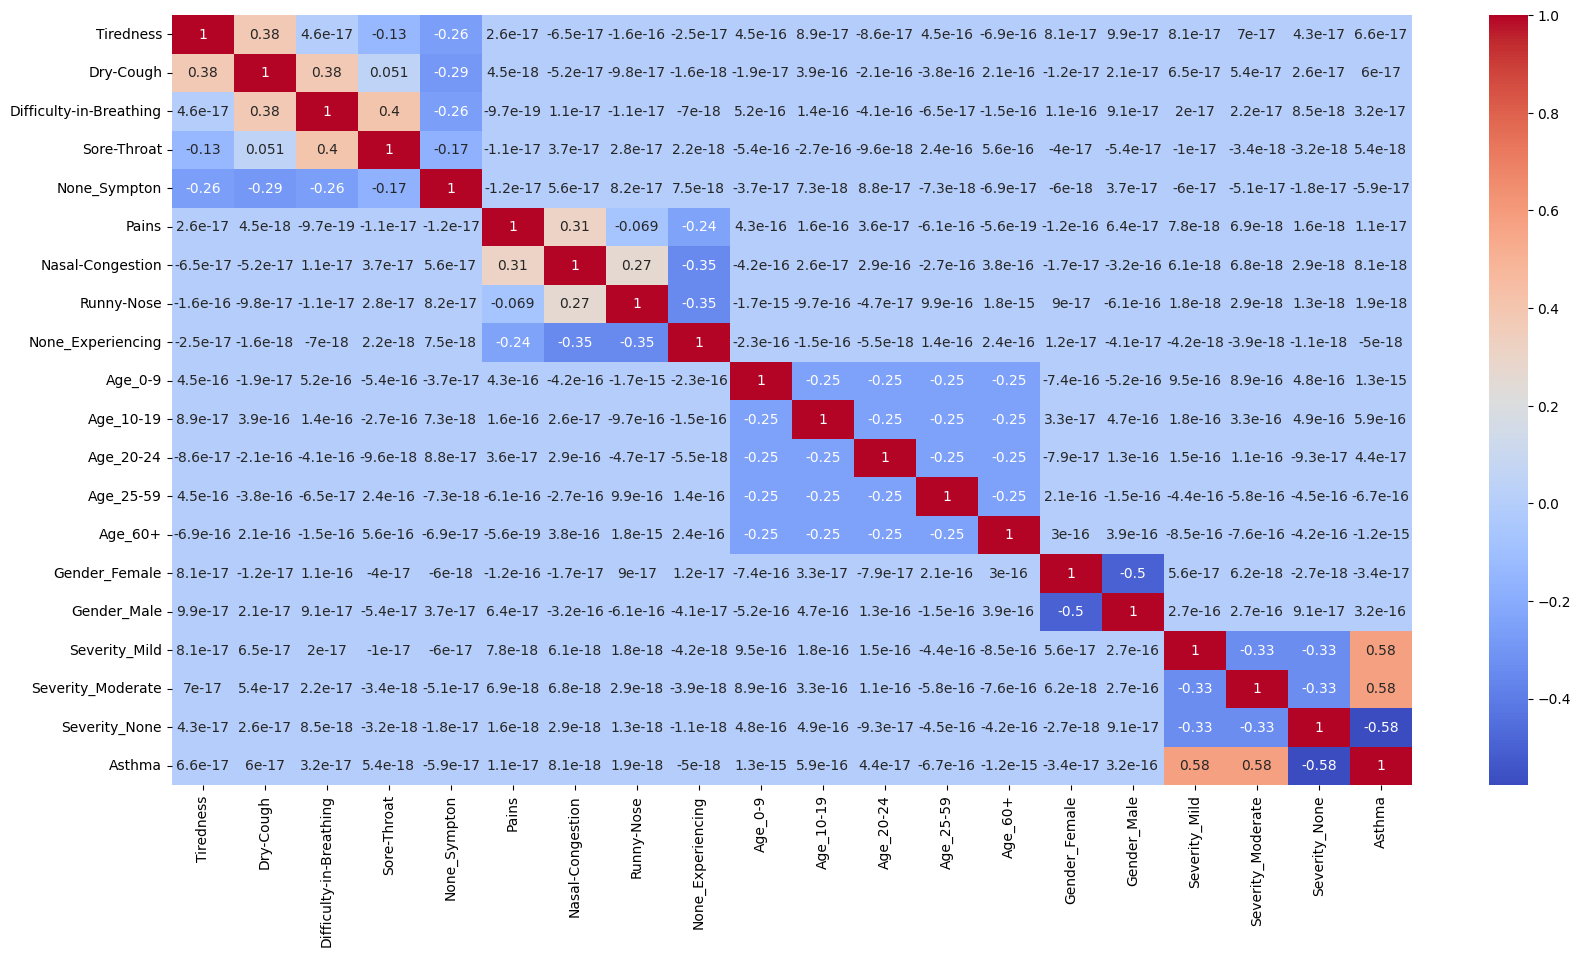

In [ ]:
# Setting up the size of the plot
plt.figure(figsize=(20, 10))  # Adjust the width and height as needed

# Plotting the heatmap
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

In [ ]:
df.corr()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Asthma
Tiredness,1.000000e+00,3.779645e-01,4.629153e-17,-1.348400e-01,-2.581989e-01,2.612420e-17,-6.526807e-17,-1.561936e-16,-2.497080e-17,4.505202e-16,8.882113e-17,-8.576039e-17,4.494736e-16,-6.949399e-16,8.081032e-17,9.912807e-17,8.139976e-17,6.958681e-17,4.345281e-17,6.642554e-17
Dry-Cough,3.779645e-01,1.000000e+00,3.779645e-01,5.096472e-02,-2.927700e-01,4.519459e-18,-5.180861e-17,-9.767619e-17,-1.629225e-18,-1.896458e-17,3.856237e-16,-2.104144e-16,-3.836201e-16,2.113728e-16,-1.167547e-17,2.092473e-17,6.498479e-17,5.418947e-17,2.588705e-17,6.041892e-17
Difficulty-in-Breathing,4.629153e-17,3.779645e-01,1.000000e+00,4.045199e-01,-2.581989e-01,-9.663757e-19,1.076763e-17,-1.091121e-17,-7.031419e-18,5.170407e-16,1.351575e-16,-4.082214e-16,-6.537695e-17,-1.540846e-16,1.121118e-16,9.093935e-17,1.982934e-17,2.211974e-17,8.468805e-18,3.153061e-17
Sore-Throat,-1.348400e-01,5.096472e-02,4.045199e-01,1.000000e+00,-1.740777e-01,-1.063529e-17,3.705775e-17,2.844633e-17,2.188163e-18,-5.386233e-16,-2.669911e-16,-9.614176e-18,2.421704e-16,5.616280e-16,-3.973996e-17,-5.405934e-17,-9.961580e-18,-3.405939e-18,-3.155159e-18,5.439189e-18
None_Sympton,-2.581989e-01,-2.927700e-01,-2.581989e-01,-1.740777e-01,1.000000e+00,-1.214988e-17,5.584296e-17,8.167388e-17,7.508786e-18,-3.727463e-17,7.307616e-18,8.789589e-17,-7.340191e-18,-6.896450e-17,-6.010305e-18,3.685726e-17,-5.966691e-17,-5.146536e-17,-1.778732e-17,-5.917902e-17
Pains,2.612420e-17,4.519459e-18,-9.663757e-19,-1.063529e-17,-1.214988e-17,1.000000e+00,3.105295e-01,-6.900656e-02,-2.390457e-01,4.312160e-16,1.639895e-16,3.621518e-17,-6.083645e-16,-5.582249e-19,-1.216691e-16,6.398151e-17,7.761069e-18,6.884521e-18,1.589900e-18,1.095250e-17
Nasal-Congestion,-6.526807e-17,-5.180861e-17,1.076763e-17,3.705775e-17,5.584296e-17,3.105295e-01,1.000000e+00,2.666667e-01,-3.464102e-01,-4.171571e-16,2.592296e-17,2.897753e-16,-2.676030e-16,3.820040e-16,-1.749997e-17,-3.172513e-16,6.092759e-18,6.829059e-18,2.947637e-18,8.055840e-18
Runny-Nose,-1.561936e-16,-9.767619e-17,-1.091121e-17,2.844633e-17,8.167388e-17,-6.900656e-02,2.666667e-01,1.000000e+00,-3.464102e-01,-1.748218e-15,-9.737599e-16,-4.729600e-17,9.949420e-16,1.777318e-15,8.987187e-17,-6.066829e-16,1.768420e-18,2.886685e-18,1.296245e-18,1.869327e-18
None_Experiencing,-2.497080e-17,-1.629225e-18,-7.031419e-18,2.188163e-18,7.508786e-18,-2.390457e-01,-3.464102e-01,-3.464102e-01,1.000000e+00,-2.270842e-16,-1.545795e-16,-5.491011e-18,1.395008e-16,2.422231e-16,1.162783e-17,-4.120360e-17,-4.184870e-18,-3.925867e-18,-1.109209e-18,-4.956614e-18
Age_0-9,4.505202e-16,-1.896458e-17,5.170407e-16,-5.386233e-16,-3.727463e-17,4.312160e-16,-4.171571e-16,-1.748218e-15,-2.270842e-16,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01,-2.500000e-01,-7.428272e-16,-5.248003e-16,9.522544e-16,8.943125e-16,4.779495e-16,1.251960e-15


In [ ]:
#in this some columns we mereged some have very less relation with the target variable and we are doing this for children only
d = df.drop(['Severity_Mild', 'Severity_None', 'Severity_Moderate','None_Experiencing','None_Sympton','Age_10-19','Age_25-59','Age_60+'],axis=1,inplace=True)

In [ ]:
X = df.drop('Asthma', axis = 1)
y = df['Asthma']

In [ ]:
#reducing the sample size for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8000, test_size=2000, stratify=y,random_state=42)
X_train

In [ ]:
#maintaining the original value
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2,random_state=42)
X_train

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Age_0-9,Age_20-24,Gender_Female,Gender_Male
255301,0,0,0,1,1,1,1,1,0,0,1
95557,1,0,0,0,0,0,0,1,0,0,1
6862,1,0,0,0,0,0,0,0,0,0,1
236371,0,0,0,1,0,0,1,0,1,0,1
102690,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
62014,1,1,1,1,0,0,1,0,0,0,0
259551,0,0,0,1,1,0,0,1,0,0,0
169152,1,1,1,0,0,1,1,0,0,0,0
269094,1,1,1,0,0,1,0,0,1,1,0


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
#training single classifier logistic ,rfc,xbg classifier

In [ ]:
logReg = LogisticRegression()

In [ ]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Making predictions
y_pred = logReg.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4925


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49      1000
           1       0.49      0.51      0.50      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Making predictions
y_pred = rfc.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.514


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52      1000
           1       0.51      0.51      0.51      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4945


In [ ]:
#stacking the classifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('ada_boost',AdaBoostClassifier()),
    ('xgb',XGBClassifier()),
    ('logistic',LogisticRegression())
]

# Initialize the meta-classifier
meta_classifier = LGBMClassifier()

# Initialize the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Making predictions
y_pred = stacking_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 4000, number of negative: 4000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.4915
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48      1000
           1       0.49      0.52      0.50      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [ ]:
#neural network prediction
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 5)                 60        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 2)                 12        
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 237 (948.00 Byte)
Trainable params: 237 (948.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
4056/4056 [==============================] - 14s 3ms/step - loss: 0.6933 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 2/100
4056/4056 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6935 - val_accuracy: 0.4959
Epoch 3/100
4056/4056 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/100
4056/4056 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6935 - val_accuracy: 0.4959
Epoch 5/100
4056/4056 [==============================] - 10s 2ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5041
Epoch 6/100
4056/4056 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5041
Epoch 7/100
4056/4056 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6934 -

In [ ]:
y_pred=model.predict(X_test)

1980/1980 [==============================] - 4s 2ms/step


In [ ]:
y_pred = np.where(y_pred>0.5,1,0)

In [ ]:
accuracy_score(y_test,y_pred)

0.4965909090909091

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.29      0.37     31476
           1       0.50      0.70      0.58     31884

    accuracy                           0.50     63360
   macro avg       0.49      0.50      0.47     63360
weighted avg       0.49      0.50      0.48     63360

